In [22]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import re

In [23]:
# from google.colab import drive
# drive.mount('/content/drive')

# Cleaning and preprocessing data

Read the original dataframe using Pandas.

In [24]:
df_all = pd.read_csv("./data/processed_data.csv")
df_all.head()

label                                            subject  \
0      1                  Generic Cialis, branded quality@    
1      0                             Typo in /debian/README   
2      1                                   authentic viagra   
3      1                               Nice talking with ya   
4      1  or trembling; stomach cramps; trouble in sleep...   

                          email_to  \
0        the00@speedy.uwaterloo.ca   
1  debian-mirrors@lists.debian.org   
2         <the00@plg.uwaterloo.ca>   
3         opt4@speedy.uwaterloo.ca   
4     ktwarwic@speedy.uwaterloo.ca   

                                          email_from  \
0                 "Tomas Jacobs" <RickyAmes@aol.com>   
1         Yan Morin <yan.morin@savoirfairelinux.com>   
2  "Sheila Crenshaw" <7stocknews@tractionmarketin...   
3       "Stormy Dempsey" <vqucsmdfgvsg@ruraltek.com>   
4         "Christi T. Jernigan" <dcube@totalink.net>   

                                             message  
0  Content-Type: text/html;\nContent-Transfer-Enc...  
1  Hi, i've just updated from the gulus and I che...  
2  Content-Type: text/plain;\n\tcharset="iso-8859...  
3  Hey Billy, \n\nit was really fun going out the...  
4  Content-Type: multipart/alternative;\n        ...

In [25]:
# We will focus on using the content of the message from the emails in the dataframe
# We drop the "email_to" and "email_from" columns
df_all.drop(columns = ['email_to', 'email_from'], inplace=True)

We check for null values, and drop them. We also check for duplicates and drop them.

In [26]:
df_all.isnull().sum()

label         0
subject     793
message    1487
dtype: int64

In [27]:
df_all.dropna(inplace=True)
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73211 entries, 0 to 75418
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    73211 non-null  int64 
 1   subject  73211 non-null  object
 2   message  73211 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.2+ MB


There are still over 70k records even after dropping null values. Check for duplicates.

In [28]:
df_all.duplicated().sum()

10847

There are many duplicate records, which are now dropped to prevent issues in training

In [29]:
df_all.drop_duplicates(inplace=True)
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62364 entries, 0 to 75418
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    62364 non-null  int64 
 1   subject  62364 non-null  object
 2   message  62364 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.9+ MB


Now over 10k records were dropped as they were duplicates. Take a look at the dataframe now.

In [30]:
df_all.head(10)

label                                            subject  \
0      1                  Generic Cialis, branded quality@    
1      0                             Typo in /debian/README   
2      1                                   authentic viagra   
3      1                               Nice talking with ya   
4      1  or trembling; stomach cramps; trouble in sleep...   
5      1                                      Which is duty   
6      1                                       For Theorize   
7      1  Theorize get inside for local esc0rts who do i...   
8      1                              Losing Weight Quickly   
9      0               [R] Confidence-Intervals.... help...   

                                             message  
0  Content-Type: text/html;\nContent-Transfer-Enc...  
1  Hi, i've just updated from the gulus and I che...  
2  Content-Type: text/plain;\n\tcharset="iso-8859...  
3  Hey Billy, \n\nit was really fun going out the...  
4  Content-Type: multipart/alternative;\n        ...  
5  Content-Type: multipart/alternative;\n        ...  
6  Content-Type: text/plain;\n\tcharset="Windows-...  
7  Content-Type: Multipart/Alternative;\n  bounda...  
8  Content-Type: text/plain;\n    charset="iso-88...  
9  Hi...\n\nI have to use R to find out the 90% c...

The contents in the `message` column are quite messy and require cleaning. Several steps will be used to clean this column:
* All text will turn into lower case characters
* Rows containing 'Content-Type' will be removed as they contain huge amounts of encoded characters that cannot be efficiently cleaned.
* Replace newline characters with a space 


In [31]:
df_all['message'] = df_all['message'].apply(lambda x: x.lower())
df_all['subject'] = df_all['subject'].apply(lambda x: x.lower())
df_all.head()

label                                            subject  \
0      1                  generic cialis, branded quality@    
1      0                             typo in /debian/readme   
2      1                                   authentic viagra   
3      1                               nice talking with ya   
4      1  or trembling; stomach cramps; trouble in sleep...   

                                             message  
0  content-type: text/html;\ncontent-transfer-enc...  
1  hi, i've just updated from the gulus and i che...  
2  content-type: text/plain;\n\tcharset="iso-8859...  
3  hey billy, \n\nit was really fun going out the...  
4  content-type: multipart/alternative;\n        ...

In [32]:
# Previous size of dataframe, before removing 'Content-Type' rows
df_all.shape

(62364, 3)

In [33]:
# New size of dataframe, after removing 'Content-Type' rows 
df_all = df_all[~df_all['message'].str.contains("content-type")]
df_all.shape

(33830, 3)

In [34]:
# Replacing all \n characters with a space " "
df_all['message_clean'] = df_all['message'].apply(lambda x: re.sub('\n', ' ', x))
df_all['subject_clean'] = df_all['subject'].apply(lambda x: re.sub('\n', ' ', x))
df_all.head()

label                                   subject  \
1       0                    typo in /debian/readme   
3       1                      nice talking with ya   
9       0      [r] confidence-intervals.... help...   
16      1                                    hi man   
19      0  re: [r] confidence-intervals.... help...   

                                              message  \
1   hi, i've just updated from the gulus and i che...   
3   hey billy, \n\nit was really fun going out the...   
9   hi...\n\ni have to use r to find out the 90% c...   
16  hey billy, \n\nit was really fun going out the...   
19  hm... sounds like a homework problem to me...\...   

                                        message_clean  \
1   hi, i've just updated from the gulus and i che...   
3   hey billy,   it was really fun going out the o...   
9   hi...  i have to use r to find out the 90% con...   
16  hey billy,   it was really fun going out the o...   
19  hm... sounds like a homework problem to me... ...   

                               subject_clean  
1                     typo in /debian/readme  
3                       nice talking with ya  
9       [r] confidence-intervals.... help...  
16                                    hi man  
19  re: [r] confidence-intervals.... help...

Once we have completed these basic preprocessing steps, we drop the original subejct and message columns and keep their respective clean columns for use in text classification.

In [35]:
df = df_all.drop(columns = ['subject', 'message'])
df.head()

label                                      message_clean  \
1       0  hi, i've just updated from the gulus and i che...   
3       1  hey billy,   it was really fun going out the o...   
9       0  hi...  i have to use r to find out the 90% con...   
16      1  hey billy,   it was really fun going out the o...   
19      0  hm... sounds like a homework problem to me... ...   

                               subject_clean  
1                     typo in /debian/readme  
3                       nice talking with ya  
9       [r] confidence-intervals.... help...  
16                                    hi man  
19  re: [r] confidence-intervals.... help...

For the purposes of training, the two columns of `message_clean` and `subject_clean` can be combined to produce a column `content` that contains both the subject and message. 

In [36]:
df['content'] = df['subject_clean'] + " " + df['message_clean'] 
df.head()

label                                      message_clean  \
1       0  hi, i've just updated from the gulus and i che...   
3       1  hey billy,   it was really fun going out the o...   
9       0  hi...  i have to use r to find out the 90% con...   
16      1  hey billy,   it was really fun going out the o...   
19      0  hm... sounds like a homework problem to me... ...   

                               subject_clean  \
1                     typo in /debian/readme   
3                       nice talking with ya   
9       [r] confidence-intervals.... help...   
16                                    hi man   
19  re: [r] confidence-intervals.... help...   

                                              content  
1   typo in /debian/readme hi, i've just updated f...  
3   nice talking with ya hey billy,   it was reall...  
9   [r] confidence-intervals.... help... hi...  i ...  
16  hi man hey billy,   it was really fun going ou...  
19  re: [r] confidence-intervals.... help... hm......

In [37]:
# Optional: save the csv file containing the final df 
# df.to_csv("/content/drive/MyDrive/Colab Notebooks/DL Project - 6 9 22/data/cleaned_data.csv")
df.to_csv("./data/cleaned_data.csv")

# Exploring the dataset 

The final dataset can be explored to look at the text inside the messages and subject lines. We use a word cloud to visualise the most common words in the message and subject lines for both spam (1) and ham (0) categories.

In [38]:
from wordcloud import WordCloud

(-0.5, 1599.5, 799.5, -0.5)

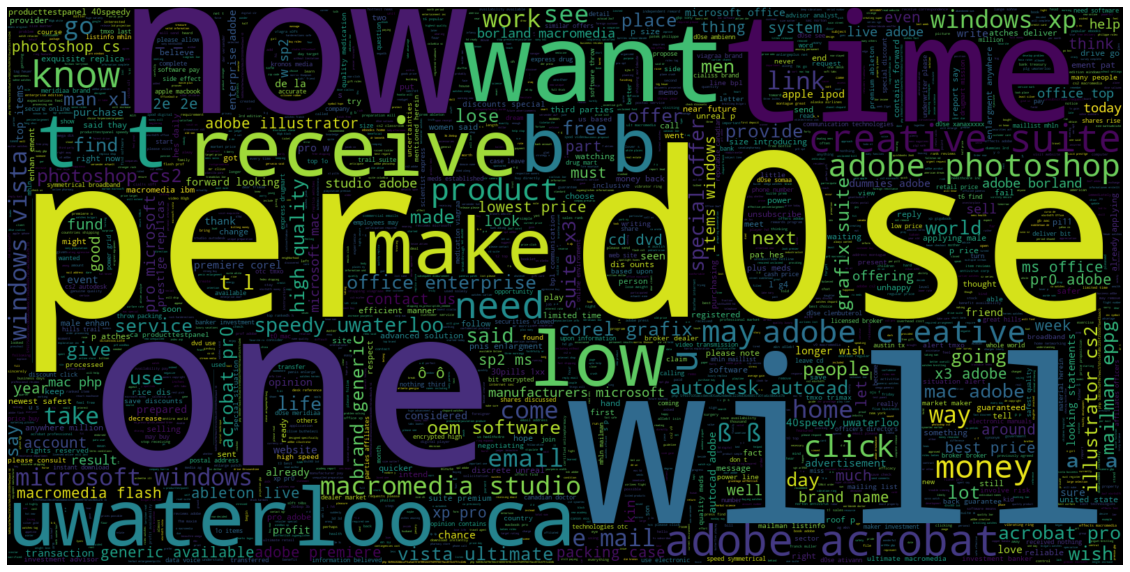

In [39]:
# Word cloud for spam messages
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.label == 1].message_clean))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")

(-0.5, 1599.5, 799.5, -0.5)

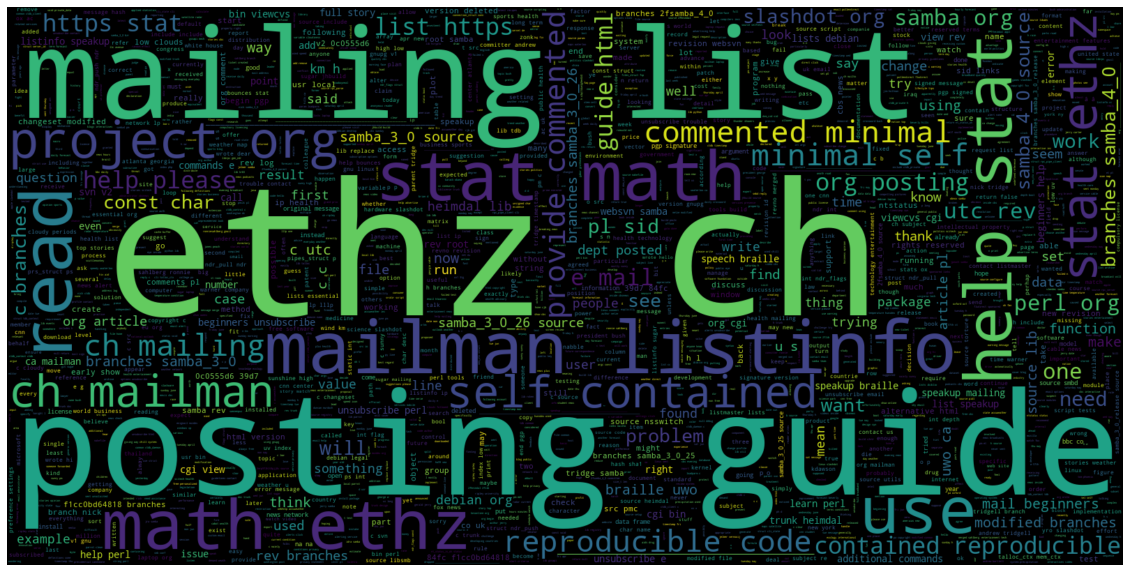

In [40]:
# Word cloud for not spam messages
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.label == 0].message_clean))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")

(-0.5, 1599.5, 799.5, -0.5)

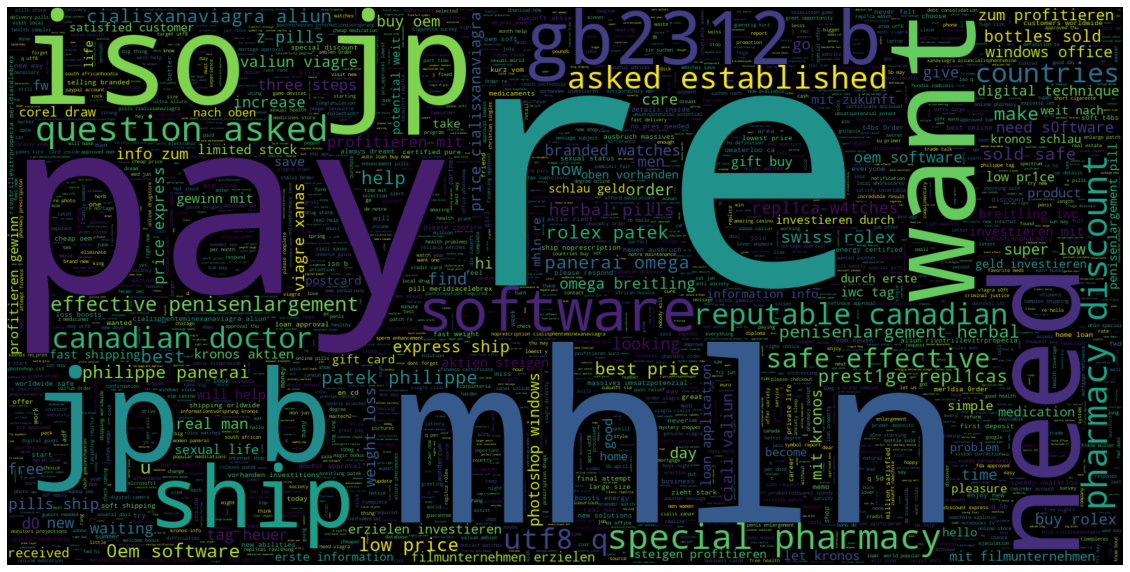

In [41]:
# Word cloud for spam subjects
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.label == 1].subject_clean))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")

(-0.5, 1599.5, 799.5, -0.5)

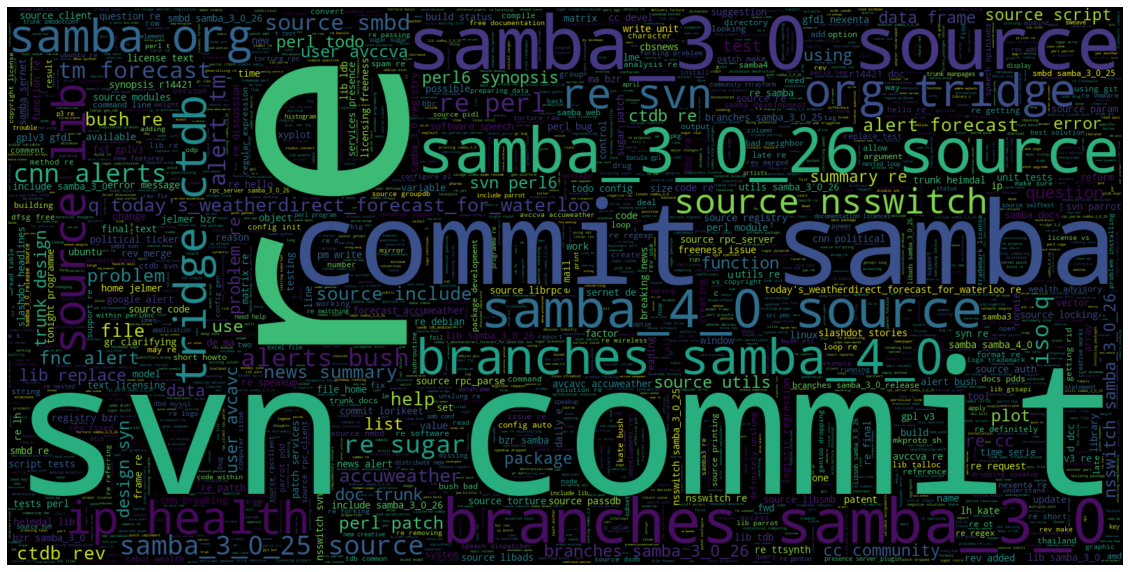

In [42]:
# Word cloud for not spam subjects
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.label == 0].subject_clean))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")

We can see that there while there are some words in the spam messages and subject lines that overlap with the not-spam messages and subject lines, the most common words are quite different between the two classes. An interesting feature noted was that many spam emails use "Re:" in the subject line to try and trick the user that this is an email they have already responded to before. It is so common that "re" itself shows up quite largely in the spam word cloud!

In [43]:
# Creating a dataset used for EDA; avoid overwriting
df_exp = df.copy()

In [44]:
import string 
count = lambda l1,l2: sum([1 for x in l1 if x in l2])

In [45]:
df_exp['msg_len'] = df_exp.message_clean.apply(lambda x: len(x))
df_exp['sub_len'] = df_exp.subject_clean.apply(lambda x: len(x))
df_exp['msg_punc'] = df_exp.message_clean.apply(lambda x: count(x, string.punctuation))
df_exp['sub_punc'] = df_exp.subject_clean.apply(lambda x: count(x, string.punctuation))
df_exp['msg_letters'] = df_exp.message_clean.apply(lambda x: count(x, string.ascii_letters))
df_exp['msg_numbers'] = df_exp.message_clean.apply(lambda x: count(x, string.digits))
df_exp['sub_letters'] = df_exp.subject_clean.apply(lambda x: count(x, string.ascii_letters))
df_exp['sub_numbers'] = df_exp.subject_clean.apply(lambda x: count(x, string.digits))
df_exp.head()

# df['count_punct'] = df.content.apply(lambda s: count(s, string.punctuation))
# str.count : df['comma_count'] = df.string_column.str.count(',')

label                                      message_clean  \
1       0  hi, i've just updated from the gulus and i che...   
3       1  hey billy,   it was really fun going out the o...   
9       0  hi...  i have to use r to find out the 90% con...   
16      1  hey billy,   it was really fun going out the o...   
19      0  hm... sounds like a homework problem to me... ...   

                               subject_clean  \
1                     typo in /debian/readme   
3                       nice talking with ya   
9       [r] confidence-intervals.... help...   
16                                    hi man   
19  re: [r] confidence-intervals.... help...   

                                              content  msg_len  sub_len  \
1   typo in /debian/readme hi, i've just updated f...      728       22   
3   nice talking with ya hey billy,   it was reall...      649       20   
9   [r] confidence-intervals.... help... hi...  i ...      990       36   
16  hi man hey billy,   it was really fun going ou...      649        6   
19  re: [r] confidence-intervals.... help... hm......     1162       40   

    msg_punc  sub_punc  msg_letters  msg_numbers  sub_letters  sub_numbers  
1         52         2          564           10           18            0  
3         25         0          483            3           17            0  
9        116        10          714           23           24            0  
16        25         0          483            3            5            0  
19       139        11          821           13           26            0

In [46]:
df_exp['label'] = df_exp['label'].astype("category")
df_exp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33830 entries, 1 to 75417
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   label          33830 non-null  category
 1   message_clean  33830 non-null  object  
 2   subject_clean  33830 non-null  object  
 3   content        33830 non-null  object  
 4   msg_len        33830 non-null  int64   
 5   sub_len        33830 non-null  int64   
 6   msg_punc       33830 non-null  int64   
 7   sub_punc       33830 non-null  int64   
 8   msg_letters    33830 non-null  int64   
 9   msg_numbers    33830 non-null  int64   
 10  sub_letters    33830 non-null  int64   
 11  sub_numbers    33830 non-null  int64   
dtypes: category(1), int64(8), object(3)
memory usage: 3.1+ MB


In [47]:
#Descriptive stats of the not-spam records
df_exp[df_exp['label'] == 0].describe()

msg_len       sub_len       msg_punc      sub_punc  \
count   20333.000000  20333.000000   20333.000000  20333.000000   
mean     2188.275414     46.930704     286.814833      4.479565   
std      6019.483730     34.127598     977.035068      5.206510   
min        11.000000      3.000000       0.000000      0.000000   
25%       757.000000     28.000000      74.000000      2.000000   
50%      1221.000000     41.000000     150.000000      3.000000   
75%      2195.000000     60.000000     273.000000      6.000000   
max    671952.000000   1290.000000  100490.000000    135.000000   

         msg_letters   msg_numbers   sub_letters   sub_numbers  
count   20333.000000  20333.000000  20333.000000  20333.000000  
mean     1426.905572     86.345104     34.635224      1.844194  
std      4017.813575    367.943907     24.167954      3.967966  
min         8.000000      0.000000      1.000000      0.000000  
25%       488.000000      9.000000     21.000000      0.000000  
50%       810.000000     27.000000     31.000000      0.000000  
75%      1407.000000     73.000000     43.000000      3.000000  
max    471476.000000  21674.000000   1054.000000     89.000000

In [48]:
#Descriptive stats of the spam records
df_exp[df_exp['label'] == 1].describe()

msg_len       sub_len      msg_punc      sub_punc    msg_letters  \
count   13497.000000  13497.000000  13497.000000  13497.000000   13497.000000   
mean      994.537082     40.031637     56.611321      1.930948     702.416092   
std      2175.096508     33.505493    102.613387      3.160727    1665.085213   
min         1.000000      1.000000      0.000000      0.000000       0.000000   
25%       334.000000     20.000000     15.000000      0.000000     225.000000   
50%       645.000000     32.000000     31.000000      1.000000     444.000000   
75%      1240.000000     51.000000     68.000000      2.000000     910.000000   
max    141935.000000    755.000000   4045.000000     58.000000  111912.000000   

        msg_numbers   sub_letters   sub_numbers  
count  13497.000000  13497.000000  13497.000000  
mean      35.234200     31.076684      1.456250  
std       86.010645     25.729012      4.550875  
min        0.000000      0.000000      0.000000  
25%        3.000000     16.000000      0.000000  
50%       11.000000     25.000000      0.000000  
75%       35.000000     39.000000      1.000000  
max     4499.000000    334.000000    208.000000

We can see that numerically, the features between the two classes are quite different. This can be visualised further using KDE plots.

In [49]:
import seaborn as sns 

/Users/prernaroy/opt/anaconda3/envs/ftds/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/prernaroy/opt/anaconda3/envs/ftds/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='sub_numbers', ylabel='Density'>

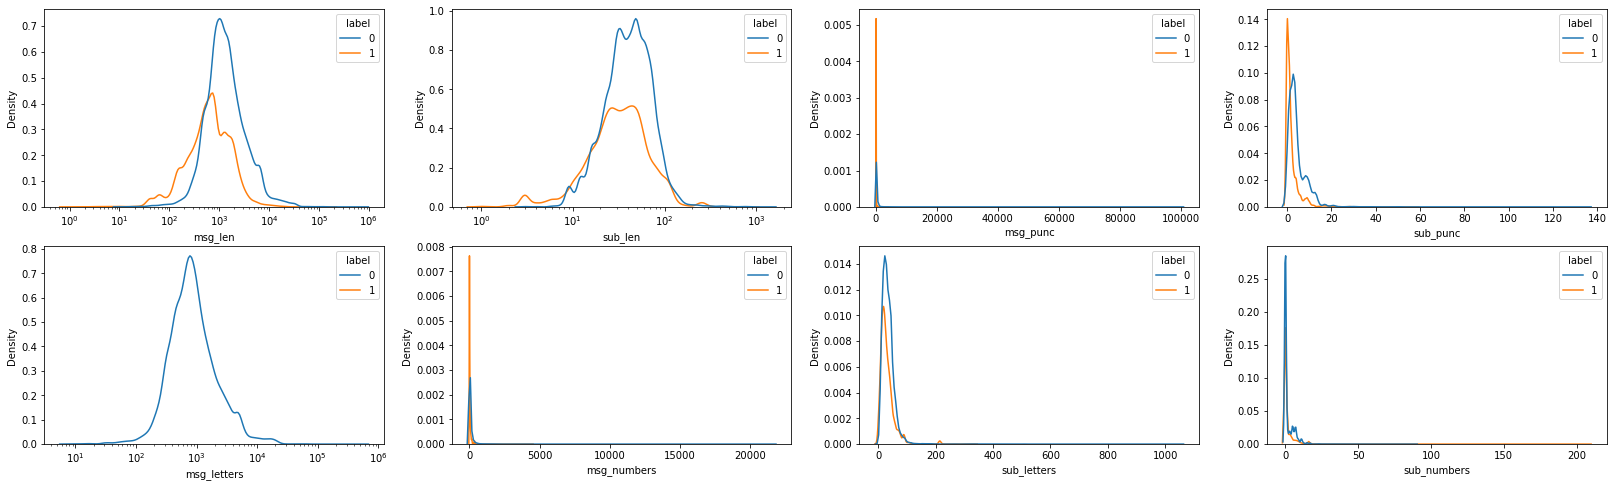

In [50]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (28,8))
sns.kdeplot(data=df_exp, x="msg_len", hue="label", ax=axes[0][0], log_scale=True)
sns.kdeplot(data=df_exp, x="sub_len", hue="label", ax=axes[0][1], log_scale=True)
sns.kdeplot(data=df_exp, x="msg_punc", hue="label", ax=axes[0][2])
sns.kdeplot(data=df_exp, x="sub_punc", hue="label", ax=axes[0][3])
sns.kdeplot(data=df_exp, x="msg_letters", hue="label", ax=axes[1][0])
sns.kdeplot(data=df_exp, x="msg_numbers", hue="label", ax=axes[1][1])
sns.kdeplot(data=df_exp, x="sub_letters", hue="label", ax=axes[1][2])
sns.kdeplot(data=df_exp, x="sub_numbers", hue="label", ax=axes[1][3])

In [51]:
df_exp[df_exp['msg_letters'] == 0].head()

label                                      message_clean  \
51        1  ×ð¾´µä¹ó¹«ë¾áìµ¼/²æîñ£ºäúºã£¡     îòêçéîã¯£¨éî...   
8481      1  äúºã£¡ ¡¡¡¡ ¡¡¡¡±¾¹«ë¾³éá¢¶àäêóð×åá¼ºãµäéç»á¹ø...   
11104     1  ïèéúäúºã£ºîòë¾óå»ý´ú¿ª½¨öþ°²×°¡¢æû³µðþàí¡¢ôëêä...   
16828     1  ·ð  é½  êð  ìú  ïè  êµ  òµ  óð  ïþ  ¹«  ë¾    ...   
16898     1  ×ð¾´µä¸ºôðèë£¨¾­àí£¯²æîñ£©äúºã£¡          ±¾¹«...   

                       subject_clean  \
51     =?gb2312?b?sk7wrrzso6gjoq==?=   
8481       =?gb2312?b?xvpstc+y0by=?=   
11104      =?gb2312?b?tpq/qreixre=?=   
16828      =?gb2312?b?0rxo8ceiycwh?=   
16898      =?gb2312?b?xvpstddfz6i=?=   

                                                 content  msg_len  sub_len  \
51     =?gb2312?b?sk7wrrzso6gjoq==?= ×ð¾´µä¹ó¹«ë¾áìµ¼...      685       29   
8481   =?gb2312?b?xvpstc+y0by=?= äúºã£¡ ¡¡¡¡ ¡¡¡¡±¾¹«...      440       25   
11104  =?gb2312?b?tpq/qreixre=?= ïèéúäúºã£ºîòë¾óå»ý´ú...      184       25   
16828  =?gb2312?b?0rxo8ceiycwh?= ·ð  é½  êð  ìú  ïè  ...     1213       25   
16898  =?gb2312?b?xvpstddfz6i=?= ×ð¾´µä¸ºôðèë£¨¾­àí£¯...      862       25   

       msg_punc  sub_punc  msg_letters  msg_numbers  sub_letters  sub_numbers  
51            4         8            0           13           15            6  
8481          1         8            0           11           12            5  
11104         0         8            0           23           13            4  
16828       109         6            0           34           13            6  
16898         3         7            0           11           13            5

In [52]:
#It seems that there are messages that do not contain characters that are readable. 
# We can remove these from the dataset as well.
drop_idx = df_exp[df_exp['msg_letters'] == 0].index.tolist()
df_exp.drop(index = drop_idx, inplace=True)

In [53]:
print(drop_idx)
print(df.shape)

[51, 8481, 11104, 16828, 16898, 17249, 19528, 20917, 21641, 22898, 23606, 23719, 23742, 25674, 26101, 28204, 28643, 29065, 31653, 33486, 36415, 36659, 37836, 37898, 38651, 38806, 44063, 46184, 48517, 48807, 50391, 52594, 53719, 55253, 59023, 60890, 61794, 61934, 63502, 66530, 69224, 70118, 75270]
(33830, 4)


In [54]:
df.drop(index = drop_idx, inplace=True)
print(df.shape)

(33787, 4)


<AxesSubplot:xlabel='sub_numbers', ylabel='Density'>

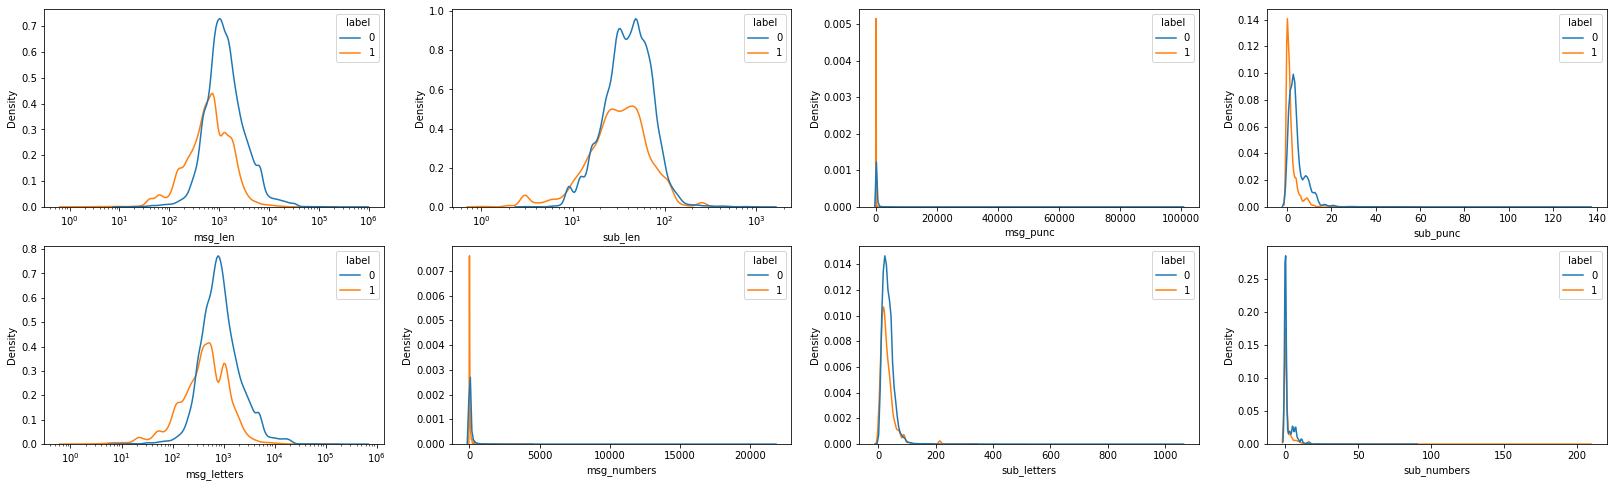

In [55]:
#New distrubution after dropping rows with no ascii characters
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (28,8))
sns.kdeplot(data=df_exp, x="msg_len", hue="label", ax=axes[0][0], log_scale=True)
sns.kdeplot(data=df_exp, x="sub_len", hue="label", ax=axes[0][1], log_scale=True)
sns.kdeplot(data=df_exp, x="msg_punc", hue="label", ax=axes[0][2])
sns.kdeplot(data=df_exp, x="sub_punc", hue="label", ax=axes[0][3])
sns.kdeplot(data=df_exp, x="msg_letters", hue="label", ax=axes[1][0], log_scale=True)
sns.kdeplot(data=df_exp, x="msg_numbers", hue="label", ax=axes[1][1])
sns.kdeplot(data=df_exp, x="sub_letters", hue="label", ax=axes[1][2])
sns.kdeplot(data=df_exp, x="sub_numbers", hue="label", ax=axes[1][3])

**Findings:**

* There is significant overlap in the distributions between the numerical features of the messages and subjects, and would likely make differentiating them without using their textual contexts very difficult.
* There is a very wide distribution in message and subject length, punctuation counts, and the number of ASCII letters and numbers across both classes of emails. The vast majority of message lengths are concentrated are around 1000 in character length; whilst the majority of email subject line are between 100 to 1000 in characters in length.
* Punctuation and numeric characters have a very wide range, but are concentrated on the lower end for both classes (for both message and subject).



---




# Preparation for Model Training - Machine Learning Methods
We will use NLP preprocessing steps to prepare the textual data in a way that will allow it to be used to train some basic machine learning models. We will create several classification models to train and test the data we have used. 

Note that a small fraction of the entire dataset will be used in lieu of the entire dataset itself. This is because huge dataset sizes can be inefficient to train in a time-effective manner. 

We will use the contents of the `message_clean` column as the solve X-variable, though using the combined `content` column is also possible. The `message_clean` column is chosen for the sake of efficiency in training, as longer strings will later require much more computational power when implementing an LSTM.

In [88]:
dfml = df.sample(frac=0.15)
dfml.shape

(5068, 4)

We will use 15% of the entire dataframe for the dataset of the ML model. More or less can be taken by changing the fraction in the above code block. A small sample is taken due to limited computational resources.

Since we are only using the `message_clean` column for the X variables, we can drop the two other columns `subject_clean` and `content`. Note that any of these three columns could be used to conduct the same text classification and their results can be compared.

In [89]:
# Understand the ratio of data 
dfml.label.value_counts(normalize=True) * 100

0    60.201263
1    39.798737
Name: label, dtype: float64

The dataset consists of about 40% of spam emails, and the remaining 60% are not spam. This is not too imbalanced so dataset balancing methods will not be used.

We will use stemming and remove stop words from the text in `message_clean`. After this, we will use `TfidfVectorizer` to vectorize the textual data.

In [90]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [92]:
port_stem = PorterStemmer()

In [240]:
def stemming(content):
    remove_punc_content = re.sub('[^0-9a-zA-Z]+', ' ', content)
    split_content = remove_punc_content.split()
    stemmed_content = [port_stem.stem(word) for word in split_content if word not in stopwords.words('english')]
    joined_stemmed = ' '.join(stemmed_content)
    return joined_stemmed

In [ ]:
dfml.drop(columns = ['subject_clean', 'content'], inplace=True)

In [242]:
dfml['message_clean_stem'] = dfml['message_clean'].apply(stemming)
dfml.head()

label                                      message_clean  \
10844      0  on 4/16/2007 8:19 pm, jiho.han wrote: > dear r...   
22225      1  yo gnitpick!!. a genuine university degree in ...   
45933      0  hi,  assume that we may model the nottingham t...   
14313      1  oem software: throw packing case, leave cd/dvd...   
21792      0  hi,  i'm using latex() from frank harrell's hm...   

                                      message_clean_stem  
10844  4 16 2007 8 19 pm jiho han wrote dear r expert...  
22225  yo gnitpick genuin univers degre notim ever th...  
45933  hi assum may model nottingham temperatur data ...  
14313  oem softwar throw pack case leav cd dvd use el...  
21792  hi use latex frank harrel hmisc librari produc...

In [243]:
# Get the X and y values
X = dfml['message_clean_stem'].values
y = dfml['label'].values

In [244]:
print(X[0])

4 16 2007 8 19 pm jiho han wrote dear r expert simpl question find way yet would like creat function accept vector creat data frame whose colnam vector exampl want function temp func name c mike john steve result temp func name result name 1 mike 2 john 3 steve right follow code temp func function x x data frame x return x problem function return colnam factor x name anyon idea work temp func


In [245]:
print(y)

[0 1 0 ... 0 0 0]


In [246]:
# Vectorize the text using TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.fit_transform(X)

In [247]:
X.shape

(5068, 45445)

In [248]:
print(X[0])
print(type(X))
print(X.shape)

  (0, 44471)	0.04969181837359509
  (0, 23349)	0.07488079099705662
  (0, 9865)	0.0738888598952085
  (0, 19266)	0.09189293099242675
  (0, 33724)	0.0576302855845526
  (0, 35683)	0.12558118296575002
  (0, 14205)	0.044848487261753826
  (0, 20031)	0.055150680237634975
  (0, 35882)	0.05328068565204094
  (0, 35630)	0.12444942586340639
  (0, 39177)	0.20015807050067164
  (0, 24963)	0.16652524495148013
  (0, 28481)	0.19646571025227935
  (0, 29565)	0.21174818733895476
  (0, 20510)	0.4727770836606514
  (0, 40486)	0.4727770836606514
  (0, 43763)	0.050672390270039565
  (0, 18957)	0.06604301939196526
  (0, 14310)	0.25971683575733634
  (0, 44151)	0.09874213854903112
  (0, 20247)	0.17516204076021105
  (0, 15755)	0.11411330816605246
  (0, 43102)	0.18203277012333158
  (0, 8669)	0.08937688715115864
  (0, 20517)	0.24303780759733956
  (0, 15203)	0.12467307446708975
  (0, 26628)	0.04675997885361597
  (0, 44523)	0.048133712985141436
  (0, 45049)	0.07956424978142436
  (0, 43848)	0.05535604836936894
  (0, 19729)

In [249]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.2,
                                                   random_state=0,
                                                   stratify=y)

## Logistic Regression Classification Model

We will make a logistic regression model as the first of the machine learning models to classify the text as spam or not spam. 

In [250]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [251]:
LR_model = LogisticRegression()

In [252]:
LR_model.fit(X_train, y_train)

LogisticRegression()

In [253]:
LR_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [254]:
LR_ypred = LR_model.predict(X_test)

In [255]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    accuracy = accuracy_score(test_labels,predictions)
    print('Model Performance')
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy

In [256]:
def evalmetrics(ytest, ypred):
    acc = accuracy_score(ytest, ypred) * 100
    print(classification_report(ytest, ypred))
    print('\n', 'Accuracy = {:0.2f}%.'.format(acc))
    ConfusionMatrixDisplay.from_predictions(ytest, ypred)
    return 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       610
           1       0.98      0.99      0.99       404

    accuracy                           0.99      1014
   macro avg       0.99      0.99      0.99      1014
weighted avg       0.99      0.99      0.99      1014


 Accuracy = 98.92%.


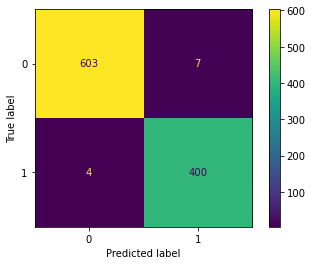

In [257]:
# Evaulating the performance of the Logistic Regression model
evalmetrics(y_test, LR_ypred)

## Naive Bayes Classification Model

In [258]:
from sklearn.naive_bayes import MultinomialNB
NB_model = MultinomialNB().fit(X_train, y_train)

In [259]:
NB_model.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

In [260]:
NB_ypred = NB_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       610
           1       0.99      0.92      0.96       404

    accuracy                           0.97      1014
   macro avg       0.97      0.96      0.96      1014
weighted avg       0.97      0.97      0.97      1014


 Accuracy = 96.65%.


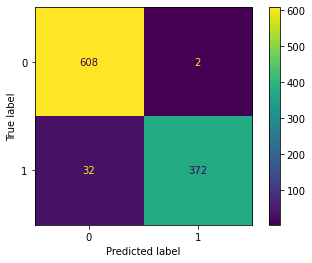

In [261]:
evalmetrics(y_test, NB_ypred)

### Support Vector Machine Classification Model

In [262]:
from sklearn.svm import SVC
SVC_model = SVC()

In [263]:
SVC_model.fit(X_train, y_train)

SVC()

In [264]:
SVC_model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [265]:
SVC_ypred = SVC_model.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       610
           1       0.99      0.99      0.99       404

    accuracy                           0.99      1014
   macro avg       0.99      0.99      0.99      1014
weighted avg       0.99      0.99      0.99      1014


 Accuracy = 99.31%.


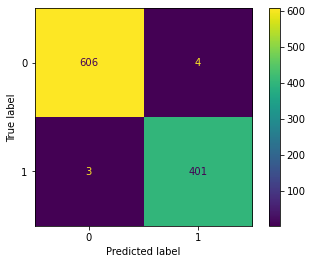

In [266]:
evalmetrics(y_test, SVC_ypred)

## Results from Machine Learning 

The results demonstrate that machine learning models are able to distinguish and classify emails as spam or not spam at a high level of accuracy. The best performing method was the Support Vector Classifier at 99.31% accuracy, whilst the Logistic Regression also provided 98.92% accuracy. Naive Bayes performed just marginally poorer at 96.65%, but is still a very high level of accuracy.

# Deep Learning Methods

Despite the very high level of accuracy achieved by common machine learning classification models, one might be interested in attempting to build a classification model using neural networks. For this section of the project, a very simple artificial neural network (ANN) will be created, as well as an LSTM. Note that the computational time is significantly higher for an LSTM, and it could potentially be difficult to optimise these networks as well without access to GPU/CPU. 

## Artificial Neural Network (ANN) Classifier

In [267]:
from sklearn.feature_extraction.text import CountVectorizer

We will continue to use the cleaned and stemmed message column (`message_clean_stem`) from the dataframe `dfml` for this section of the project. We will re-initialise the `X` and `y` values, as they will be processed in a different way using `CountVectorizer` instead. 

In [268]:
dfml.head()

label                                      message_clean  \
10844      0  on 4/16/2007 8:19 pm, jiho.han wrote: > dear r...   
22225      1  yo gnitpick!!. a genuine university degree in ...   
45933      0  hi,  assume that we may model the nottingham t...   
14313      1  oem software: throw packing case, leave cd/dvd...   
21792      0  hi,  i'm using latex() from frank harrell's hm...   

                                      message_clean_stem  
10844  4 16 2007 8 19 pm jiho han wrote dear r expert...  
22225  yo gnitpick genuin univers degre notim ever th...  
45933  hi assum may model nottingham temperatur data ...  
14313  oem softwar throw pack case leav cd dvd use el...  
21792  hi use latex frank harrel hmisc librari produc...

In [292]:
messages = dfml['message_clean_stem'].values
y = dfml['label'].values

In [294]:
messages_train, messages_test, y_train, y_test = train_test_split(messages, y,
                                                                 test_size = 0.2,
                                                                 random_state=0,
                                                                 stratify=y)

In [296]:
countVectorizer = CountVectorizer() #has lots of parameters we could use, max/min_df; n_gram, stop_words
countVectorizer.fit(messages_train)
X_train = countVectorizer.transform(messages_train)
X_test = countVectorizer.transform(messages_test)
X_train

<4054x40322 sparse matrix of type '<class 'numpy.int64'>'
	with 394183 stored elements in Compressed Sparse Row format>

In [297]:
#Check types of each train and test
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'scipy.sparse.csr.csr_matrix'>
<class 'scipy.sparse.csr.csr_matrix'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


You may run into a problem trying to use a sparse matrix as an input into the neural network. We change it into a numpy array beforehand.

In [298]:
X_train = X_train.toarray()
X_test = X_test.toarray()

In [299]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(4054, 40322) (4054,) (1014, 40322) (1014,)


In [300]:
from keras.models import Sequential
from keras import layers

In [301]:
input_dim = X_train.shape[1]

In [302]:
X_train.shape

(4054, 40322)

In [303]:
model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [304]:
model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                403230    
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 403,241
Trainable params: 403,241
Non-trainable params: 0
_________________________________________________________________


In [305]:
history = model.fit(X_train, y_train,
                    epochs = 20,
                    verbose = False,
                    validation_data = (X_test, y_test),
                    batch_size = 1000)

In [306]:
loss, accuracy = model.evaluate(X_train, y_train, verbose = False)
print("Training Accuracy: {:.4f}".format(accuracy))

loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9998
Testing Accuracy:  0.9921


In [307]:
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

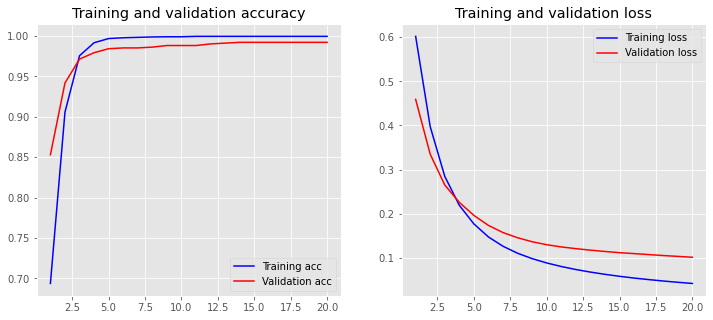

In [308]:
plot_history(history)

## Results from ANN Classification model

The results demonstrate that a very simple artificial neural network is capable of achieving very high accuracy, with a training accuracy of 99.98% and a testing accuracy of 99.21%. This is model could be further developed to include dropout layers and additional layers to improve it further. There is still a risk of model overfitting or not being highly generalisable. 

## LSTM Classification Model

In addition to the ANN, another deep learning model know as an LSTM is used to create another classification model. Before we start building the LSTM, it is important to understand some of the characteristics of our textual data to make better informed choices to the parameters used within the LSTM. 

In [328]:
import tensorflow as tf
from nltk.stem import SnowballStemmer
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

In [310]:
dfml_exp = dfml.copy()

In [311]:
dfml_exp['approx_word_count'] = dfml_exp['message_clean_stem'].apply(lambda x: count(x, ' '))
dfml_exp.describe()

label  approx_word_count
count  5068.000000        5068.000000
mean      0.397987         191.330308
std       0.489531         334.103162
min       0.000000           0.000000
25%       0.000000          58.000000
50%       0.000000         107.000000
75%       1.000000         202.250000
max       1.000000        7677.000000

In [317]:
dfml_exp[dfml_exp['approx_word_count'] < 525].count()

label                 4760
message_clean         4760
message_clean_stem    4760
approx_word_count     4760
dtype: int64

For this fraction of the dataset that was taken, we find there are approximately 191 words (denoted by the number of spaces found in the emails). About 93% of the emails contain 525 or fewer spaces, which indicates there are typically less than 525 words long at most. This information can be used to set the maximum sequence length for the LSTM.

LSTM will use a different preprocessing step, which will not only remove all punctuation and non-alphanumeric characters, but also remove links and emails inside the message contents. This is done below.

In [347]:
stop_words = stopwords.words('english')
snow_stem = SnowballStemmer('english')
text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [348]:
def text_cleaning(text):
    text = re.sub(text_cleaning_re, ' ', str(text)).strip()
    split_content = text.split()
    stemmed_content = [snow_stem.stem(word) for word in split_content if word not in stopwords.words('english')]
    joined_stemmed = ' '.join(stemmed_content)
    return joined_stemmed

In [ ]:
# def stemming(content):
#     remove_punc_content = re.sub('[^0-9a-zA-Z]+', ' ', content)
#     split_content = remove_punc_content.split()
#     stemmed_content = [port_stem.stem(word) for word in split_content if word not in stopwords.words('english')]
#     joined_stemmed = ' '.join(stemmed_content)
#     return joined_stemmed

In [ ]:
dfml['message_clean_stem_dl'] = dfml['message_clean'].apply(lambda x: text_cleaning(x))
dfml.head()

In [329]:
max_sequence_length = 525

In [321]:
train_data, test_data = train_test_split(dfml, 
                                        test_size = 0.2,
                                        random_state=0)
print("Train data size:", len(train_data))
print("Test data size:", len(test_data))

Train data size: 4054
Test data size: 1014


In [322]:
train_data.head()

label                                      message_clean  \
63563      0  zach,  you build speakup on lfs the same way y...   
57709      1  there are a lot of online drugstores on the we...   
37459      1  dear homeowner,          you have been pre-app...   
74693      0  i got it! thank all of you,sorry i am a freshm...   
30724      1  the cream of the crop for 2007 - get in early!...   

                                      message_clean_stem  
63563  zach build speakup lf way build anywher els de...  
57709  lot onlin drugstor web equal trustworthi unit ...  
37459  dear homeown pre approv 402 000 refin loan rat...  
74693  got thank sorri freshman r 2007 7 5 toma goico...  
30724  cream crop 2007 get earli dsdi set rock portfo...

In [320]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.message_clean_stem_dl)
word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1 
print("Vocabularly size:", vocab_size)

In [ ]:
#Pad sequences will make the text in messages all the same size 
X_train = pad_sequences(tokenizer.texts_to_sequences(train_data.message_clean_stem_dl),
                        maxlen = max_sequence_length)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_data.message_clean_stem_dl),
                       maxlen = max_sequence_length)

print("Training X Shape:", X_train.shape)
print("Testing X Shape:", X_test.shape)

Notes for updates:
- Update to snowball stemmer, seems to be a better version than porter stemmer
    - from nltk.stem import SnowballStemmer 
- Look at the sequence length again for LSTM - maybe around 250-300 is okay?